In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
a = np.array([[1, 2], [3, 4]])
m = np.mat(a)
m

matrix([[1, 2],
        [3, 4]])

In [3]:
a

array([[1, 2],
       [3, 4]])

In [4]:
m.T

matrix([[1, 3],
        [2, 4]])

In [5]:
m * m

matrix([[ 7, 10],
        [15, 22]])

In [6]:
a * a

array([[ 1,  4],
       [ 9, 16]])

In [7]:
np.linalg.det(m)

-2.0000000000000004

In [8]:
m.I

matrix([[-2. ,  1. ],
        [ 1.5, -0.5]])

In [9]:
def standRegres(dataSet):
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T*yMat)
    return ws

In [10]:
ex0 = pd.read_table('ex0.txt', header=None)
ex0.head()

,0,1,2
0,1.0,0.067732,3.176513
1,1.0,0.427810,3.816464
2,1.0,0.995731,4.550095
3,1.0,0.738336,4.256571
4,1.0,0.981083,4.560815


In [11]:
ws = standRegres(ex0)
ws

matrix([[3.00774324],
        [1.69532264]])

In [12]:
ws

matrix([[3.00774324],
        [1.69532264]])

In [13]:
yhat = ex0.iloc[:, :-1].values * ws

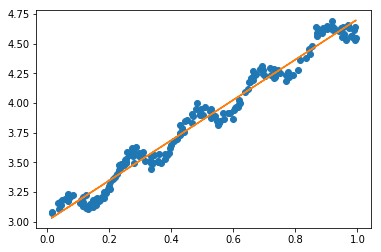

In [14]:
plt.plot(ex0.iloc[:, 1], ex0.iloc[:, 2], 'o')
plt.plot(ex0.iloc[:, 1], yhat)

In [15]:
y = ex0.iloc[:, -1].values
yhat = yhat.reshape([200,]) 
rss = np.power(yhat - y, 2).sum()
rss

1.3552490816814902

In [16]:
def sseCal(dataSet, regres):
    n = dataSet.shape[0]
    y = dataSet.iloc[:, -1].values
    ws = regres(dataSet)
    yhat = dataSet.iloc[:, :-1].values * ws
    yhat = yhat.reshape([n,])
    rss = np.power(yhat - y, 2).sum()
    return rss

In [17]:
sseCal(ex0, standRegres)

1.3552490816814902

In [18]:
def rSquare(dataSet, regres):
    sse = sseCal(dataSet, regres)
    y = dataSet.iloc[:, -1].values
    sst = np.power(y - y.mean(), 2).sum()
    return 1 - sse / sst

In [19]:
rSquare(ex0, standRegres)

0.9731300889856916

In [20]:
def ridgeRegres(dataSet, lam=0.2):
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xTx = xMat.T * xMat
    denom = xTx + np.eye(xMat.shape[1])*lam
    ws = denom.I * (xMat.T * yMat)
    return ws

In [21]:
aba = pd.read_table('abalone.txt', header = None)
aba.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [22]:
aba.iloc[:, 0] = 1
aba.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
rws = ridgeRegres(aba)
rws

matrix([[  3.0178564 ],
        [ -0.02075972],
        [ 11.4007625 ],
        [ 11.02315972],
        [  8.71725704],
        [-19.64613377],
        [ -8.96257395],
        [  9.18180982]])

In [24]:
rSquare(aba, ridgeRegres)

0.5274036413294175

In [25]:
rSquare(aba, standRegres)

0.5276299399919839

In [26]:
standRegres(aba)

matrix([[  2.98515418],
        [ -1.57189738],
        [ 13.36091617],
        [ 11.82607248],
        [  9.24741445],
        [-20.21391319],
        [ -9.82967548],
        [  8.57624241]])

In [27]:
def Z_ScoreNormalization(dataSet):
    stdDf = dataSet.std()
    meanDf = dataSet.mean()
    normSet = (dataSet - meanDf) / stdDf
    return normSet

In [28]:
aba2 = Z_ScoreNormalization(aba)

In [29]:
aba = pd.read_table('abalone.txt', header = None)
aba.head()

,0,1,2,3,4,5,6,7,8
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [30]:
def regularize(xMat):
    inMat = xMat.copy()
    inMeans = np.mean(inMat,axis = 0)
    inVar = np.std(inMat,axis = 0)
    inMat = (inMat - inMeans)/inVar
    return inMat

In [31]:
def gradDescent_0(dataSet,eps=0.01,numIt=5000):
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    yMat = regularize(yMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for k in range(numIt):
        grad = xMat.T * (xMat * weights - yMat) / m
        weights = weights - eps * grad
    return weights

In [32]:
gradDescent_0(aba,eps=0.01,numIt=50000)

matrix([[ 0.01620147],
        [-0.05978597],
        [ 0.4136334 ],
        [ 0.15396292],
        [ 1.35621595],
        [-1.37401013],
        [-0.31965523],
        [ 0.38881046]])

In [33]:
def gradDescent_1(dataSet,eps=0.01,numIt=5000):
    dataSet = dataSet.sample(numIt, replace=True)
    dataSet.index = range(dataSet.shape[0])
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    yMat = regularize(yMat)
    m, n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(m):
        grad = xMat[i].T * (xMat[i] * weights - yMat[i])
        weights = weights - eps * grad
    return weights

In [34]:
gradDescent_1(aba, eps=0.01,numIt=500000)

matrix([[-0.03621098],
        [-0.06218487],
        [ 0.49378329],
        [ 0.17184388],
        [ 1.47060613],
        [-1.58593991],
        [-0.24221558],
        [ 0.26797295]])

In [35]:
sseCal(aba, standRegres)

21089.034262497444

In [36]:
sseCal(aba2, standRegres)

/root/anaconda3/lib/python3.6/site-packages/numpy/linalg/linalg.py:1874: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


nan

In [37]:
gradDescent_0(aba, eps=0.01,numIt= 50000)

matrix([[ 0.01620147],
        [-0.05978597],
        [ 0.4136334 ],
        [ 0.15396292],
        [ 1.35621595],
        [-1.37401013],
        [-0.31965523],
        [ 0.38881046]])

In [ ]:
def sseCal_1(dataSet, ws):
    n = dataSet.shape[0]
    y = dataSet.iloc[:, -1].values
    yhat = dataSet.iloc[:, :-1].values * ws
    yhat = yhat.reshape([n,])
    rss = np.power(yhat - y, 2).sum()
    return rss

In [ ]:
gradDescent_0(aba, eps=0.01, numIt= 50000)

In [41]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

In [40]:
def logisticReg_0(dataSet,eps=0.01,numIt=5000):
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for k in range(numIt):
        grad = xMat.T * (sigmoid(xMat * weights) - yMat) / m
        weights = weights - eps * grad
    return weights

In [42]:
testSet = pd.read_table('testSet_1.txt', header=None)
testSet.head()

,0,1,2
0,-0.017612,14.053064,0
1,-1.395634,4.662541,1
2,-0.752157,6.538620,0
3,-1.322371,7.152853,0
4,0.423363,11.054677,0


In [43]:
ws = logisticReg_0(testSet, eps=0.01,numIt=500)
ws

matrix([[ 0.08644437],
        [-1.26921488]])

In [44]:
xMat = np.mat(testSet.iloc[:, :-1].values)
yMat = np.mat(testSet.iloc[:, -1].values).T
xMat = regularize(xMat)

In [47]:
p = sigmoid(xMat * ws).A.flatten()

In [52]:
l = [2, 1, 3]

In [53]:
for i, j in enumerate(l):
    print(i)
    print("Next")
    print(j)

0
Next
2
1
Next
1
2
Next
3


In [54]:
for i, j in enumerate(p):
    if j < 0.5:
        p[i] = 0
    else:
        p[i] = 1

In [55]:
p

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.])

In [57]:
(np.fabs(yMat.A.flatten() - p)).sum()

8.0

In [58]:
train_error = (np.fabs(yMat.A.flatten() - p)).sum()
train_error

8.0

In [59]:
train_error_rate = train_error / yMat.shape[0]
train_error_rate

0.08

In [60]:
def logisticAcc(dataSet, method, eps=0.01, numIt=500):
    weights = method(dataSet,eps=eps,numIt=numIt)
    p = sigmoid(xMat * ws).A.flatten()
    for i, j in enumerate(p):
        if j < 0.5:
            p[i] = 0
        else:
            p[i] = 1
    train_error = (np.fabs(yMat.A.flatten() - p)).sum()
    trainAcc = 1 - train_error / yMat.shape[0]
    return trainAcc

In [61]:
logisticAcc(testSet, logisticReg_0)

0.92

In [64]:
def logisticReg_1(dataSet,eps=0.01,numIt=50000):
    dataSet = dataSet.sample(numIt, replace=True)
    dataSet.index = range(dataSet.shape[0])
    xMat = np.mat(dataSet.iloc[:, :-1].values)
    yMat = np.mat(dataSet.iloc[:, -1].values).T
    xMat = regularize(xMat)
    m,n = xMat.shape
    weights = np.zeros((n,1))
    for i in range(m):
        grad = xMat[i].T * (sigmoid(xMat[i] * weights) - yMat[i])
        weights = weights - eps * grad
    return weights

In [68]:
logisticReg_1(testSet, eps=0.01,numIt=500000)

matrix([[ 1.56630376],
        [-7.31150612]])

In [66]:
logisticReg_0(testSet, eps=0.01,numIt=500)

matrix([[ 0.08644437],
        [-1.26921488]])

In [75]:
logisticAcc(testSet, logisticReg_1, eps=0.01, numIt=500000)

0.92